# Task1. Tensors

## 1-1. Tensor란?

PyTorch에서 쓰이는 특수한 자료형으로써 간단히 말하면 다차원의 배열(행렬)이다. 넘파이의 ndarray와 흡사하고, GPU에서 연산이 가능하다는 특징을 지닌다.

우선 과제 실행을 위해 토치와 넘파이를 import한다.

In [12]:
import torch
import numpy as np

## 1-2. Tensor 생성하기

tensor를 생성하는 방법은 크게 네 가지이다.

 - 데이터를 직접 생성해서 그것을 tensor로 변환

In [3]:
data = [[1,2],[3,4]]
x_data = torch.tensor(data)

 - numpy 배열을 가져와서 tensor로 변환


In [5]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

 - 다른 tensor를 참고하기
 
 아래 셀에서 출력된 값을 보면 짐작할 수 있듯이, `ones_like()`는 주어진 x_data와 같은 shape를 갖고 1로 채워진 tensor를 만든다. `dtype` 파라미터를 따로 지정하지 않는 이상 자료형도 입력 데이터와 같다. 
 
 반면 `rand_like()`는 x_data와 같은 shape를 갖고 랜덤한 값이 채워진 tensor를 만든다. 아래 예시에선 `dtype`을 float으로 지정하여 tensor가 부동소수점으로 구성되었다.

In [7]:
x_ones = torch.ones_like(x_data) 
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) 
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.1070, 0.2733],
        [0.2788, 0.0900]]) 



 - random한 값 또는 특정 상수로 자동 생성

 shape라는 튜플로 차원을 지정해준다. 각 함수는 함수명에서 유추할 수 있듯이 tensor의 값을 어떻게 채울지를 규정한다.

In [9]:
shape = (3,4,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.9799, 0.4003, 0.8558, 0.9359],
        [0.6210, 0.1666, 0.5250, 0.3560],
        [0.6416, 0.0952, 0.9590, 0.8127]]) 

Ones Tensor: 
 tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


## 1-3. Tensor의 속성(attribute)

 - `shape()`: tensor의 차원을 알려준다.
 - `dtype()`: tensor의 자료형을 알려준다.
 - `device()`: tensor가 저장된 장치를 알려준다. 

In [17]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## 1-4. Tensor 연산(operation)

페이지에 GPU 사용에 대한 언급이 나오는데, 코랩의 경우 설정에서 GPU를 실행시킬 수 있긴 하지만 일단 나는 스킵했다!

tensor를 인덱싱, 슬라이싱하거나 다양한 방식으로 산술 연산할 수도 있다.

In [16]:
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

아래는 인덱싱과 슬라이싱의 예시이다.

In [54]:
tensor = torch.ones(4, 4)
print(tensor, "\n")
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0 # 두번째 열을 0으로 변환
print(tensor)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]) 

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


`torch.cat()`을 사용하여 텐서들을 연결할 수 있다. dim은 기준 축을 지정해주는데, 0이면 가로로, 1이면 세로로 결합한다. 

In [31]:
print(tensor, "\n")
t1 = torch.cat([tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1.]])


두 텐서 간의 행렬곱을 계산한다. y1, y2, y3이 모두 같은 값을 출력한다. 이 때, `matmul()` 함수는 broadcasting을 수행하여 두 텐서의 차원이 맞지 않아도 자동 연산이 수행된다. `out` 파라미터를 y3으로 지정함으로써 출력값으로 y3을 저장한다. 반면 `mm()` 함수는 broadcasting 기능이 없어 두 tensor의 shape가 맞아야 사용 가능하다.

In [55]:
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)
y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])

tensor의 각 요소별 곱을 계산한다. z1, z2, z3이 모두 같은 값을 출력한다.

In [56]:
z1 = tensor * tensor
z2 = tensor.mul(tensor)
z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

`sum()` 함수로 tensor의 모든 요소 합계를 나타낼 수 있다. 또한 tensor로 저장된 agg를 `item()` 함수를 사용하여 python의 숫자 자료형으로 바꿀 수 있다.

In [45]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))
print(agg)

12.0 <class 'float'>
tensor(12.)


`_` 언더바를 함수 뒤에 붙여줌으로써 연산 결과를 저장하는 것이 가능하다. 사이킷런에서 `inplace=True`를 설정해주는 것과 유사하다. 아래 예시에서 `add_(5)`를 해줌으로써 tensor 각 요소에 5가 더해졌고, 연산 결과가 그대로 tensor 변수에 저장이 되었다.



In [46]:
print(f"{tensor} \n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


## 1-5. Numpy 변환


tensor와 numpy 배열은 같은 메모리 공간을 공유한다. 그래서 특이하게도 하나를 변경하면 다른 하나도 자동으로 변경이 된다. 아래 예시에서 tensor에 1을 더해줬는데, numpy에도 별다른 조작 없이 1이 더해진 것을 확인할 수 있다.

In [49]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n} \n")

t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.] 

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


위 과정을 역으로 진행하여 numpy 배열을 tensor로 변환해도 마찬가지인 것을 확인할 수 있다.

In [52]:
t = torch.ones(5)
n = np.ones(5)
print(f"t: {t}")
t = torch.from_numpy(n)
print(f"n: {n} \n")


np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.] 

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]




---



# Task2. A Gentle Intorduction to torch.autograd

## 2-1. 사용법

`torch.autograd()`는 신경망에서 핵심이라고 할 수 있는 **역전파(Backward Propagation)**를 구현한다. 이론적인 내용은 생략하고, 바로 코드를 실행해보도록 하자.

torchvision의 pretrained 모델인 resnet18을 사용해볼 것이다.

In [58]:
import torch, torchvision
model = torchvision.models.resnet18(pretrained=True)
data = torch.rand(1, 3, 64, 64) # 3채널짜리 가로 세로가 64 by 64인 이미지 1개를 tensor로 만든다.
labels = torch.rand(1, 1000) # 정답값인label은 (1, 1000) 차원의 무작위 값으로 만든다.

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

resnet18의 구조는 아래와 같다. 크게 layer 4개를 사용했고, 합성곱, 배치정규화, ReLU함수 등이 쓰인 것을 알 수 있다.

In [62]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

이제 예측을 진행해볼 것이다. 생성한 model에 data를 입력해준다. 이것이 역전파에 선행되는 **순전파(Forward Propagation)**이다.

In [59]:
prediction = model(data)

이제 실제 label과 prediction의 오차를 합하여 loss라는 변수에 할당한다. 실제 모델링 과정에서는 다양한 손실함수를 쓰지만, 여기선 약식으로 오차의 합을 사용한 것 같다.

`backward()` 함수를 통해 신경망을 거슬러 올라가면서 역전파가 진행된다. 이 과정에서 gradient 값들이 자동 계산된다.

In [64]:
loss = (prediction - labels).sum()
loss.backward() 

optimizer로는 `SGD()`를 불러왔다. `lr`은 learning rate를 의미하고, `momentum`은 경사 하강법에 관성을 더해주는 방식이다. 간단히 말하면 local minimum을 global minimum으로 착각하고 학습을 멈추는 것을 미연에 방지한다.

In [65]:
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

`step()`을 해줌으로써 역전파 과정에서 저장된 값으로 weight들을 조정해준다. 이 일련의 과정을 지정한 epoch만큼 반복해가며 loss를 줄여나가는 것이 신경망의 flow라고 할 수 있다.

In [66]:
optim.step()

## 2-2. Autograd의 미분 원리

우선 tensor 두 개를 만든다. 이 때 `requires_grad=True`로 설정해줌으로써 autograd가 작동할 수 있게끔 만들어준다.

In [80]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

이제 두 tensor를 변수로 하는 다항식 Q를 만든다.

In [81]:
Q = 3*a**3 - b**2

Q를 a에 대해 미분한 값은 9*a**2이고 b에 대해 미분한 값은 -2*b이다. `backward()`가 이를 잘 수행하는지 확인해보자.

우선 Q 역시도 벡터이므로 `backward()`에 자기 자신에 대한 미분값을 인자로 넣어줘야 한다. 이 때 미분값은 1이므로 [1., 1.] 텐서를 인자로 넣어준다.

In [82]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

이렇게 되면 a와 b 변수의 `grad` 속성에 역전파를 통해 계산된 값이 저장된다. 앞서 계산한 값과 동일한지를 확인해보자.

In [83]:
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


## 2-3. DAG에서 제외하기

앞서 `requires_grad=True`을 함으로써 autograd를 사용할 수 있다고 언급했다. 반대로 이 파라미터를 False로 지정하면 그 tensor에 한하여 autograd를 실행하지 않는다.

아래 예시에서 z라는 tensor는 requires_grad가 True로 설정되었다. 이 경우 b는 z를 포함하기 때문에 설령 x가 True로 지정되지 않았더라도 autograd의 대상이 된다. 즉, input tensor 중 하나라도 True이면 autograd가 실행된다.

In [ ]:
x = torch.rand(5, 5)
y = torch.rand(5, 5)
z = torch.rand((5, 5), requires_grad=True)

a = x + y
print(f"Does `a` require gradients? : {a.requires_grad}")
b = x + z
print(f"Does `b` require gradients?: {b.requires_grad}")

이처럼 autograd를 지정하지 않는 변수들을 frozen parameter라고 일컫는다. freeze를 하는 이유가 무엇일까? 굳이 역전파를 수행하지 않아도 지장이 없는 변수들이 존재하기 마련인데, 이들을 그대로 freeze(고정)하는 것이 연산량의 절약, 성능상의 이득으로 이어지기 때문이다.

fine tuning 과정에서 파라미터를 freeze하는 것이 대표적인 예시라고 할 수 있다. 이미 학습된 값을 건드리지 않고, classifier layer만 변경해준다.

In [84]:
from torch import nn, optim

model = torchvision.models.resnet18(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [85]:
# 앞서 resnet18의 구조에서 알 수 있듯, 마지막 linear layer의 input은 512였고, label은 10개였다.
model.fc = nn.Linear(512, 10) 

이로써 `model.fc`에 저장된 분류층만 autograd가 수행되고 이전 모든 과정은 autograd가 수행되지 않는다.

In [86]:
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)



---



# Task3. Neural Networks

## 3-1. 신경망 정의하기

`torch.nn` 패키지를 이용하여 신경망을 만들어볼 수 있다. 이미지를 분류하는 신경망을 만들어보자.

In [87]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    # 사용할 층들을 정의해주는 과정이다.
    def __init__(self):
        # 부모클래스인 nn.module의 __init__ 메소드를 호출해주고 여기에 딸린 변수들을 상속받는다
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)

        self.fc1 = nn.Linear(16 * 5 * 5, 120) 
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    # 신경망을 forward propagation해준다.
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


신경망의 파라미터들은 `net.parameters()`에 저장되어 있다.

In [91]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 5, 5])


이제 임의의 32by32 tensor를 생성하여 신경망에 forward 해보자. 아래처럼 최종적으로 (1,10)의 tensor를 출력한다.

In [92]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.0168, -0.0189,  0.0504,  0.0663, -0.0094,  0.0444, -0.0423,  0.0284,
         -0.0406,  0.0419]], grad_fn=<AddmmBackward0>)


신경망을 학습할 때 필수적으로 해줘야 하는 것이 `zero.gead()`이다. 이는 gradients 값을 0으로 초기화시켜주는 과정으로써, 각 epoch를 수행할 때마다 거쳐야 한다. 이렇게 해주는 까닭은 gradient가 누적되지 않고 리셋되어야 올바른 역전파가 수행되기 때문이다.

In [93]:
net.zero_grad()
out.backward(torch.randn(1, 10))

## 3-2. 손실 함수

손실 함수(Loss Function)은 예측값과 실제값을 인자로 받아 loss를 계산해준다. 여러가지 손실함수 중 MSEloss(평균제곱오차)를 사용해보자.

target은 임의의 실제값으로, `view(1,-1)`을 통해 예측값과 같은 shape로 만들어준다. 그리고 1criterion1이란 변수에 손실함수를 할당해주고 계산을 한다.

In [94]:
output = net(input)
target = torch.randn(10)
target = target.view(1, -1)
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.6752, grad_fn=<MseLossBackward0>)


`loss.backward()`로 역전파를 수행할 때 `.grad_fn` 속성을 확인해보면 역전파의 단계를 추적해볼 수 있다. 아래 셀에서 마지막 3단계만 추적해보자.

In [95]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

## 3-3. 역전파

본격적으로 loss를 역전파해볼 것이다. 앞서 언급했듯이, gradient를 초기화하기 위해 `.zero_grad()`를 사용한다. 아래에서 역전파 전 후의 conv1의 bias의 gradient 변화를 비교해볼 것이다. 역전파 전에는 모든 gradient가 0으로 초기화되어 있을 것이다.

In [96]:
net.zero_grad()

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0072,  0.0026,  0.0118, -0.0164, -0.0034, -0.0182])


## 3-4. weight 업데이트

이제 각 단계에서 저장된 gradient를 통해 weight를 업데이트 해볼 것이다. Task2에서 언급했듯이 `.step()` 함수로 간단히 실행할 수 있다. 일련의 과정은 아래와 같다.

옵티마이저로 쓰인 SGD는 아래 식으로 가중치를 업데이트 한다.

updated w = w - learning rate * gradient

In [ ]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.01)

optimizer.zero_grad()
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()



---



# Task4. Training a Classifier

## 4-1. 데이터셋 로드 및 정규화

Task1~3까지 배운 내용을 밑바탕으로 이제 본격적인 이미지 분류를 해볼 것이다. torchvision의 데이터셋을 사용할 것이다. 

In [98]:
import torch
import torchvision
import torchvision.transforms as transforms

transforms는 학습 이전에 수행하는 이미지 정규화이다. 이로써 역전파 계산 시 이미지 데이터가 유사한 범위를 가지게 해준다.

`transforms.ToTensor()`를 통해 픽셀 값이 [0,1] 범위를 갖게 되고, `transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))`을 해줌으로써 [-1,1]의 범위를 갖게 된다. 이는 RGB 3개의 채널의 픽셀 값에서 0.5를 뺀 뒤 0.5로 나누어 정규화를 진행한다는 의미이다.

In [100]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

데이터를 불러올 때 앞서 정의한 transform을 지정해줄 수 있다. train set과 test set을 따로 불러온다.

`DataLoader()`를 사용함으로써 데이터를 미니 배치 사이즈(아래 예시에선 4)로 쪼개어서 불러올 수 있다. 즉, iterator 형식으로 데이터를 가공해준다는 것이다.

10개의 class를 정의해준다.

In [102]:
batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


아래 함수는 데이터셋에 내장된 tensor를 이미지로 만들어서 랜덤으로 4개 출력해주는 함수이다.

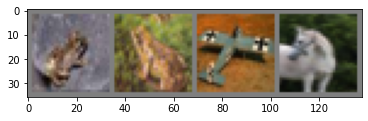

frog  frog  plane horse


In [104]:
import matplotlib.pyplot as plt
import numpy as np


def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = next(dataiter)

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

## 4-2. CNN 정의하기

Task3에서 정의했던 Net 신경망을 그대로 가져오되, 기존에 채널을 1개만 설정해준 것을 3개로 늘릴 것이다.

`torch.flatten()`은 차원을 1차원으로 만드는 평면화 작업인데, conv2 layer에서 linear layer로 넘어가기 전에 수행되어야 한다.

In [105]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # 채널을 3개로 수정. 나머지는 동일하다.
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # 배치를 제외한 모든 차원을 flat하게 펴줌으로써 linear 함수에 input하게 만든다.
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

## 4-3. 손실 함수와 옵티마이저 정의하기

손실 함수는 CrossEntropyLoss를 사용할 것이다. 이는 다중분류에서 쓰이는 대표적인 손실함수이다.

옵티마이저로는 SGD를 사용하도록 한다.

In [106]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## 4-4. RUN!

이제 정해진 epoch만큼 반복하여 신경망을 학습할 것이다. 이전 task에서 봤던 flow와 동일하다.

In [108]:
for epoch in range(2): # 2번 반복

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # data에서 input 값과 label 값 받기
        inputs, labels = data

        # gradient 초기화
        optimizer.zero_grad()

        outputs = net(inputs) # 순전파
        loss = criterion(outputs, labels) # 손실을 계산
        loss.backward() # 손실을 바탕으로 gradient 업데이트
        optimizer.step() # updated gradient를 바탕으로 weight update

        running_loss += loss.item()
        if i % 2000 == 1999: # 2000개의 데이터마다 loss 현황 출력
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.181
[1,  4000] loss: 1.850
[1,  6000] loss: 1.672
[1,  8000] loss: 1.569
[1, 10000] loss: 1.502
[1, 12000] loss: 1.453
[2,  2000] loss: 1.380
[2,  4000] loss: 1.360
[2,  6000] loss: 1.362
[2,  8000] loss: 1.333
[2, 10000] loss: 1.275
[2, 12000] loss: 1.260
Finished Training


## 4-5. test set으로 성능 검사

앞서 train한 model로 test set을 잘 분류하는지 확인해보도록 할 것이다.(튜토리얼 페이지에 모델을 저장하고 불러오는 과정은 생략했습니다)

우선 test set에 내장된 이미지를 4개 불러온다.

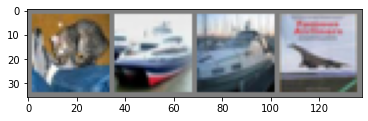

GroundTruth:  cat   ship  ship  plane


In [116]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# 이미지를 출력합니다.
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

그리고 앞서 학습한 net 모델을 이용하여 위 4개의 사진이 tensor 형태로 주어진 images를 분류해보자.

In [117]:
outputs = net(images)

앞서 net을 정의할 때 가장 마지막 layer를 linear layer로 정의했다. 즉, 위에서 얻은 outputs 값은 label값을 반환해주는 것이 아니라 10개 label에 대한 [-1,1] 범위의 확률값을 반환한다. 그렇다면 10개 중에서 가장 높은 확률을 갖는 label을 예측값으로 만들어주면 될 것이다.

웹사이트에선 네 개 모두 정답이었는데, seed가 고정된 것이 아니라서 내 코드에선 3번째 label이 틀려버렸다.

In [118]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   ship  car   plane


이제 전체 test set에 대해 분류를 해보자. evaluate를 할 때는 train을 할 때와 다르게 gradient를 업데이트해선 안 된다. 그렇기에 `with torch.no_grad()`를 적어준다.

마지막 줄에 출력물은 정답으로 맞힌 label 개수를 전체 label 개수로 나눠준 것이다.

In [119]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data

        outputs = net(images) # 순전파. evaluate를 하는 것이니 역전파 없이 순전파만.
        _, predicted = torch.max(outputs.data, 1) # 확률이 최대인 label을 예측값으로 선정
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 56 %


코드를 조금 변형하면 각 class마다의 정확도도 확인할 수 있다.

In [120]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1 # 정답이면 correct_pred의 해당 class에 1을 추가한다.
            total_pred[classes[label]] += 1


# 각 분류별 정확도(accuracy)를 출력
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 59.4 %
Accuracy for class: car   is 80.9 %
Accuracy for class: bird  is 32.0 %
Accuracy for class: cat   is 32.2 %
Accuracy for class: deer  is 52.5 %
Accuracy for class: dog   is 50.3 %
Accuracy for class: frog  is 67.7 %
Accuracy for class: horse is 63.1 %
Accuracy for class: ship  is 68.3 %
Accuracy for class: truck is 62.3 %


## 4-6. GPU에서 학습 수행

신경망을 GPU에서 실행하도록 할 수 있다.

In [121]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [122]:
# 나의 경우 CUDA가 없어서 cpu로 돌아간다.
print(device)

cpu


만약 device가 CUDA로 정의되었다면 아래처럼 코드를 수정하여 GPU에서 학습을 진행할 수 있다. 수정한 부분을 주석처리했다.

GPU의 효과를 볼 수 있는 건 지금보다 신경망이 더 복잡해졌을 때이다.

In [ ]:
net.to(device) # 정의한 모델을 GPU에 할당해준다
for epoch in range(2):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):

        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs) 
        loss = criterion(outputs, labels) 
        loss.backward() 
        optimizer.step() 

        running_loss += loss.item()
        if i % 2000 == 1999: 
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')